<h1 style="color:#FF335E; text-align:center">Covid-19 Case Prediction in USA</h1>

<h2 style="text-align:center; color:#33FF68">Machine Learning Models Implementation</h2>

In [6]:
# Algebra Linear
import numpy as np

# Data processing
import pandas as pd
from sklearn.preprocessing import LabelBinarizer

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Algorithms
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report, roc_auc_score
from sklearn import preprocessing

<h2 style="text-align:center; color:#FF5733"> [CM1] Loading covid dataset dan data cleaning / preprocessing</h2>

In [7]:
df = pd.read_csv('dkmacovid_train.csv')
df.sample(10)

,Day,State ID,State,Lat,Long_,Active,Incident_Rate,Total_Test_Results,Case_Fatality_Ratio,Testing_Rate,Resident Population 2020 Census,Population Density 2020 Census,Density Rank 2020 Census,SexRatio,Confirmed,Deaths,Recovered
1348,31,17,Kansas,38.5266,-96.7265,267542,9506.561943,1168723,1.360144,40116.61633,"2,937,880",35.9,43,99,False,True,False
875,21,2,Alaska,61.3707,-152.4044,52351,7190.945191,1430967,0.482844,195608.88260,"733,391",1.3,52,109,True,True,False
377,10,10,Florida,27.7663,-81.6868,1454098,6876.934940,16817965,1.551242,78304.17609,"21,538,187",401.4,10,96,True,True,False
606,15,9,District of Columbia,38.8974,-77.0268,9167,4695.720433,986795,2.540736,139822.37310,"689,545","11,280.00",1,96,True,False,True
4,2,5,California,36.1162,-119.6816,2362015,6045.109130,33391442,1.111215,84509.14544,"39,538,223",253.7,13,99,True,True,False
571,14,22,Massachusetts,42.2302,-71.5301,116766,6592.699343,12046398,2.956193,174775.37550,"7,029,917",901.2,5,94,True,True,True
1175,27,28,Nebraska,41.1254,-98.2681,53661,9759.264850,2052707,1.015446,106115.51440,"1,961,504",25.5,45,100,True,True,True
833,20,6,Colorado,39.0598,-105.3111,353615,6585.247179,5098541,1.429751,88535.76549,"5,773,714",55.7,39,101,True,True,True
1030,24,21,Maryland,39.0639,-76.8021,325113,5647.867568,6723502,2.010531,111211.67510,"6,177,224",636.1,7,94,True,True,True
185,6,2,Alaska,61.3707,-152.4044,41514,6684.346144,1311015,0.449907,179211.80520,"733,391",1.3,52,109,True,True,False


In [8]:
df.describe()

,Day,State ID,Lat,Long_,Active,Incident_Rate,Total_Test_Results,Case_Fatality_Ratio,Testing_Rate,Density Rank 2020 Census,SexRatio
count,1380.000000,1380.000000,1380.000000,1380.000000,1.380000e+03,1380.000000,1.380000e+03,1380.000000,1380.000000,1380.000000,1380.000000
mean,16.500000,25.239130,39.470717,-92.879928,2.610390e+05,7203.192905,5.271097e+06,1.631757,91763.237514,27.173913,97.760870
std,8.658579,14.513405,6.070494,19.632514,4.914059e+05,2305.025102,6.991478e+06,0.656702,40858.185997,15.378197,3.219219
min,2.000000,1.000000,21.094300,-157.498300,9.550000e+02,1232.233261,3.739460e+05,0.439598,30524.071590,1.000000,94.000000
25%,9.000000,12.000000,35.630100,-105.311100,2.731600e+04,6042.134459,1.310515e+06,1.246993,67457.197525,13.000000,95.000000
50%,16.500000,25.500000,39.583950,-88.259400,1.005915e+05,7453.675955,2.919566e+06,1.499993,85438.613770,28.500000,97.000000
75%,24.000000,37.000000,43.326600,-77.209800,2.592418e+05,8621.924085,6.093790e+06,1.817013,104509.453475,41.000000,99.000000
max,31.000000,51.000000,61.370700,-69.381900,3.283336e+06,12811.162350,4.227902e+07,3.928767,235733.711200,52.000000,109.000000


In [9]:
df.shape

(1380, 17)

In [10]:
df.columns

Index(['Day', 'State ID', 'State', 'Lat', 'Long_', 'Active', 'Incident_Rate',
       'Total_Test_Results', 'Case_Fatality_Ratio', 'Testing_Rate',
       'Resident Population 2020 Census', 'Population Density 2020 Census',
       'Density Rank 2020 Census', 'SexRatio', 'Confirmed', 'Deaths',
       'Recovered'],
      dtype='object')

In [11]:
# menampilkan basic informasi tentang tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1380 entries, 0 to 1379
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Day                              1380 non-null   int64  
 1   State ID                         1380 non-null   int64  
 2   State                            1380 non-null   object 
 3   Lat                              1380 non-null   float64
 4   Long_                            1380 non-null   float64
 5   Active                           1380 non-null   int64  
 6   Incident_Rate                    1380 non-null   float64
 7   Total_Test_Results               1380 non-null   int64  
 8   Case_Fatality_Ratio              1380 non-null   float64
 9   Testing_Rate                     1380 non-null   float64
 10  Resident Population 2020 Census  1380 non-null   object 
 11  Population Density 2020 Census   1380 non-null   object 
 12  Density Rank 2020 Ce

In [12]:
# Menampilkan sampel nomor pada setiap kelas
df['Confirmed'].value_counts()

True     1329
False      51
Name: Confirmed, dtype: int64

In [13]:
df['Deaths'].value_counts()

True     1244
False     136
Name: Deaths, dtype: int64

In [14]:
df['Recovered'].value_counts()

True     864
False    516
Name: Recovered, dtype: int64

<h2 style="text-align:center;color:#FF5733">Feature Description</h2> <br><br>
<ul>
<li>Day: Tanggal di Januari mulai dari 2 jan - 31 jan</li>
<li>State ID: Nomor ID sewenang-wenang untuk setiap negara bagian, berdasarkan urutan abjad. Perhatikan ada 51 negara bagian karena distrik of Columbia juga termasuk.</li>
<li>State: Nama negara bagian US</li>
<li>Lat: Lintang untuk pusat geografis negara bagian.</li>
<li>Long: Bujur untuk pusat geografis negara bagian.</li>
<li>Active: Jumlah kasus COVID-19 yang aktif dan terlacak hari itu di negara bagian tersebut.</li>
<li>Incident Rate: Kasus per 100 ribu orang</li>
<li>Total Test Result: Jumlah total orang yang telah dites</li>
<li>Case Fatality Ratio (%): Jumlah kematian yang tercatat / jumlah kasus</li>
<li>Testing Rate: Total hasil tes per 100 ribu orang</li>
<li>Resident Population 2021 Census: Lihat sumber data asli</li>
<li>Population Density 2021 Census: Lihat sumber data asli</li>
<li>Density Rank 2021 Census: Lihat sumber data asli</li>
<li>Sex Ratio: Lihat sumber data asli</li>
</ul>


<h2 style="text-align:center; color:#FF5733">Preprocessing / cleaning the Covid Dataset</h2><br><br>
<h3>Preprocessing step</h3>
<ol>
<li>Memeriksa nilai yang Hilang di Kolom.</li>
<li>Memeriksa catatan duplikat dan hapus jika ada.</li>
<li>Menghapus fitur yang sangat bergantung satu sama lain. Di Dataset Covid kita punya [State ID], jadi kita tidak perlu [State, Long, Lat] dan drop fitur ini.</li>
<li>Ketik Casting data [Sensus Penduduk 2020] dan [Sensus Kepadatan Penduduk 2020] ke dalam tipe data float.</li>
<li>One Hot Encoding [Hari] & [State ID] memungkinkan representasi data menjadi lebih ekspresif. Digunakan untuk mengubah data kategorikal menjadi data integer.</li>
<li>Memeriksa outlier - Titik data yang berbeda secara signifikan dari pengamatan lain. Dengan memplot Histogram, kita melihat distribusi data untuk variabel dan menemukan nilai yang berada di luar distribusi.</li>
<li>Melakukan Regularisasi Skor Z - skor membantu untuk memahami apakah nilai data lebih besar atau lebih kecil dari rata-rata dan seberapa jauhnya dari rata-rata. Jika nilai Z suatu titik data lebih dari 3, hal ini menunjukkan bahwa titik data tersebut cukup berbeda dengan titik data lainnya. Titik data seperti itu bisa menjadi outlier. #### Penghapusan Pencilan: - Menghapus baris yang memiliki [Incident_Rate] lebih besar dari 2,5 nilai Z-Score atau kurang dari -2,5 nilai Z-Score Menghapus baris yang memiliki [Case_Fatality_Ratio] lebih besar dari 3 nilai Z-Score atau lebih kecil dari -3 Nilai Z-Score.</li>
</ol>

In [15]:
df

,Day,State ID,State,Lat,Long_,Active,Incident_Rate,Total_Test_Results,Case_Fatality_Ratio,Testing_Rate,Resident Population 2020 Census,Population Density 2020 Census,Density Rank 2020 Census,SexRatio,Confirmed,Deaths,Recovered
0,2,1,Alabama,32.3182,-86.9023,162449,7535.061394,1891468,1.318688,38576.31315,"5,024,279",99.2,29,94,True,False,False
1,2,2,Alaska,61.3707,-152.4044,40421,6534.252848,1290349,0.449781,176386.82510,"733,391",1.3,52,109,True,True,False
2,2,3,Arizona,33.7298,-111.4312,452222,7407.212013,5218721,1.680608,39916.14181,"7,151,502",62.9,35,99,True,True,True
3,2,4,Arkansas,34.9697,-92.3731,24012,7669.219075,2079788,1.611203,68917.26567,"3,011,524",57.9,36,96,True,True,True
4,2,5,California,36.1162,-119.6816,2362015,6045.109130,33391442,1.111215,84509.14544,"39,538,223",253.7,13,99,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1375,31,46,Vermont,44.0459,-72.7107,3537,1917.501751,897351,1.454242,143808.78510,"643,077",69.8,33,97,True,True,True
1376,31,47,Virginia,37.7693,-78.1700,457993,5913.864172,5234155,1.280560,61322.04732,"8,631,393",218.6,16,97,True,True,True
1377,31,49,West Virginia,38.4912,-80.9545,21195,6751.734093,1945579,1.672713,108561.35130,"1,793,716",74.6,31,98,True,True,True
1378,31,50,Wisconsin,44.2685,-89.6165,68537,10169.973590,6177575,1.086567,106099.52810,"5,893,718",108.8,27,99,True,True,True


In [16]:
# memeriksa null values
df.isnull().sum()

Day                                0
State ID                           0
State                              0
Lat                                0
Long_                              0
Active                             0
Incident_Rate                      0
Total_Test_Results                 0
Case_Fatality_Ratio                0
Testing_Rate                       0
Resident Population 2020 Census    0
Population Density 2020 Census     0
Density Rank 2020 Census           0
SexRatio                           0
Confirmed                          0
Deaths                             0
Recovered                          0
dtype: int64

In [17]:
# memeriksa duplikasi baris
duplicated = df.duplicated().sum()
if duplicated:
    print('Duplicate in the covid datasets are: {}'.format(duplicated))
else:
    print('Dataset does not contain any duplicate values')

Dataset does not contain any duplicate values


In [18]:
#Menghapus fitur yang sangat bergantung satu sama lain. Misalnya, kami memiliki ID negara bagian,
#dengan demikian kita tidak memerlukan nama negara bagian, ukuran garis lintang dan garis bujur.

covid = df.copy(deep=True)
covid = covid.drop('Lat', axis=1)
covid = covid.drop('Long_', axis=1)
covid = covid.drop('State', axis=1)

In [19]:
covid

,Day,State ID,Active,Incident_Rate,Total_Test_Results,Case_Fatality_Ratio,Testing_Rate,Resident Population 2020 Census,Population Density 2020 Census,Density Rank 2020 Census,SexRatio,Confirmed,Deaths,Recovered
0,2,1,162449,7535.061394,1891468,1.318688,38576.31315,"5,024,279",99.2,29,94,True,False,False
1,2,2,40421,6534.252848,1290349,0.449781,176386.82510,"733,391",1.3,52,109,True,True,False
2,2,3,452222,7407.212013,5218721,1.680608,39916.14181,"7,151,502",62.9,35,99,True,True,True
3,2,4,24012,7669.219075,2079788,1.611203,68917.26567,"3,011,524",57.9,36,96,True,True,True
4,2,5,2362015,6045.109130,33391442,1.111215,84509.14544,"39,538,223",253.7,13,99,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1375,31,46,3537,1917.501751,897351,1.454242,143808.78510,"643,077",69.8,33,97,True,True,True
1376,31,47,457993,5913.864172,5234155,1.280560,61322.04732,"8,631,393",218.6,16,97,True,True,True
1377,31,49,21195,6751.734093,1945579,1.672713,108561.35130,"1,793,716",74.6,31,98,True,True,True
1378,31,50,68537,10169.973590,6177575,1.086567,106099.52810,"5,893,718",108.8,27,99,True,True,True


In [20]:
#Type-casting data populasi dan kepadatan penduduk menjadi tipe data float
covid[['Resident Population 2020 Census', 'Population Density 2020 Census']] = covid[['Resident Population 2020 Census', 'Population Density 2020 Census']].replace({",":""}, regex=True).apply(pd.to_numeric,1)
covid.describe()

,Day,State ID,Active,Incident_Rate,Total_Test_Results,Case_Fatality_Ratio,Testing_Rate,Resident Population 2020 Census,Population Density 2020 Census,Density Rank 2020 Census,SexRatio
count,1380.000000,1380.000000,1.380000e+03,1380.000000,1.380000e+03,1380.000000,1380.000000,1.380000e+03,1380.000000,1380.000000,1380.000000
mean,16.500000,25.239130,2.610390e+05,7203.192905,5.271097e+06,1.631757,91763.237514,5.906191e+06,454.834783,27.173913,97.760870
std,8.658579,14.513405,4.914059e+05,2305.025102,6.991478e+06,0.656702,40858.185997,6.858898e+06,1638.774933,15.378197,3.219219
min,2.000000,1.000000,9.550000e+02,1232.233261,3.739460e+05,0.439598,30524.071590,5.768510e+05,1.300000,1.000000,94.000000
25%,9.000000,12.000000,2.731600e+04,6042.134459,1.310515e+06,1.246993,67457.197525,1.455271e+06,44.100000,13.000000,95.000000
50%,16.500000,25.500000,1.005915e+05,7453.675955,2.919566e+06,1.499993,85438.613770,4.098304e+06,103.500000,28.500000,97.000000
75%,24.000000,37.000000,2.592418e+05,8621.924085,6.093790e+06,1.817013,104509.453475,7.029917e+06,253.700000,41.000000,99.000000
max,31.000000,51.000000,3.283336e+06,12811.162350,4.227902e+07,3.928767,235733.711200,3.953822e+07,11280.000000,52.000000,109.000000


In [21]:
#Mengekstrak fitur covid dan memisahkan label
covid_features = covid[covid.columns.difference(['Confirmed', 'Deaths', 'Recovered'])]
covid_features.head()

,Active,Case_Fatality_Ratio,Day,Density Rank 2020 Census,Incident_Rate,Population Density 2020 Census,Resident Population 2020 Census,SexRatio,State ID,Testing_Rate,Total_Test_Results
0,162449,1.318688,2,29,7535.061394,99.2,5024279.0,94,1,38576.31315,1891468
1,40421,0.449781,2,52,6534.252848,1.3,733391.0,109,2,176386.82510,1290349
2,452222,1.680608,2,35,7407.212013,62.9,7151502.0,99,3,39916.14181,5218721
3,24012,1.611203,2,36,7669.219075,57.9,3011524.0,96,4,68917.26567,2079788
4,2362015,1.111215,2,13,6045.109130,253.7,39538223.0,99,5,84509.14544,33391442


In [22]:
# One-hot encoding
def One_hot_encoded(covid, feature):
    encoder = LabelBinarizer()
    encoder.fit(covid[feature])
    transformed_feature = encoder.transform(covid[feature])
    ohe = pd.DataFrame(transformed_feature)
    ohe = ohe.add_prefix(feature + '_')
    return covid_features[covid_features.columns.difference([feature])].join(ohe)

In [23]:
covid_features = One_hot_encoded(covid_features, 'State ID')
covid_features = One_hot_encoded(covid_features, 'Day')
covid_features.describe()

,Active,Case_Fatality_Ratio,Density Rank 2020 Census,Incident_Rate,Population Density 2020 Census,Resident Population 2020 Census,SexRatio,State ID_0,State ID_1,State ID_10,...,Day_20,Day_21,Day_22,Day_23,Day_24,Day_25,Day_26,Day_27,Day_28,Day_29
count,1.380000e+03,1380.000000,1380.000000,1380.000000,1380.000000,1.380000e+03,1380.000000,1380.000000,1380.000000,1380.000000,...,1380.000000,1380.000000,1380.000000,1380.000000,1380.000000,1380.000000,1380.000000,1380.000000,1380.000000,1380.000000
mean,2.610390e+05,1.631757,27.173913,7203.192905,454.834783,5.906191e+06,97.760870,0.021739,0.021739,0.021739,...,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333
std,4.914059e+05,0.656702,15.378197,2305.025102,1638.774933,6.858898e+06,3.219219,0.145883,0.145883,0.145883,...,0.179571,0.179571,0.179571,0.179571,0.179571,0.179571,0.179571,0.179571,0.179571,0.179571
min,9.550000e+02,0.439598,1.000000,1232.233261,1.300000,5.768510e+05,94.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.731600e+04,1.246993,13.000000,6042.134459,44.100000,1.455271e+06,95.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.005915e+05,1.499993,28.500000,7453.675955,103.500000,4.098304e+06,97.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.592418e+05,1.817013,41.000000,8621.924085,253.700000,7.029917e+06,99.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.283336e+06,3.928767,52.000000,12811.162350,11280.000000,3.953822e+07,109.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<h2 style="text-align:center; color:#FF8D33">Checking for Outliers</h2>

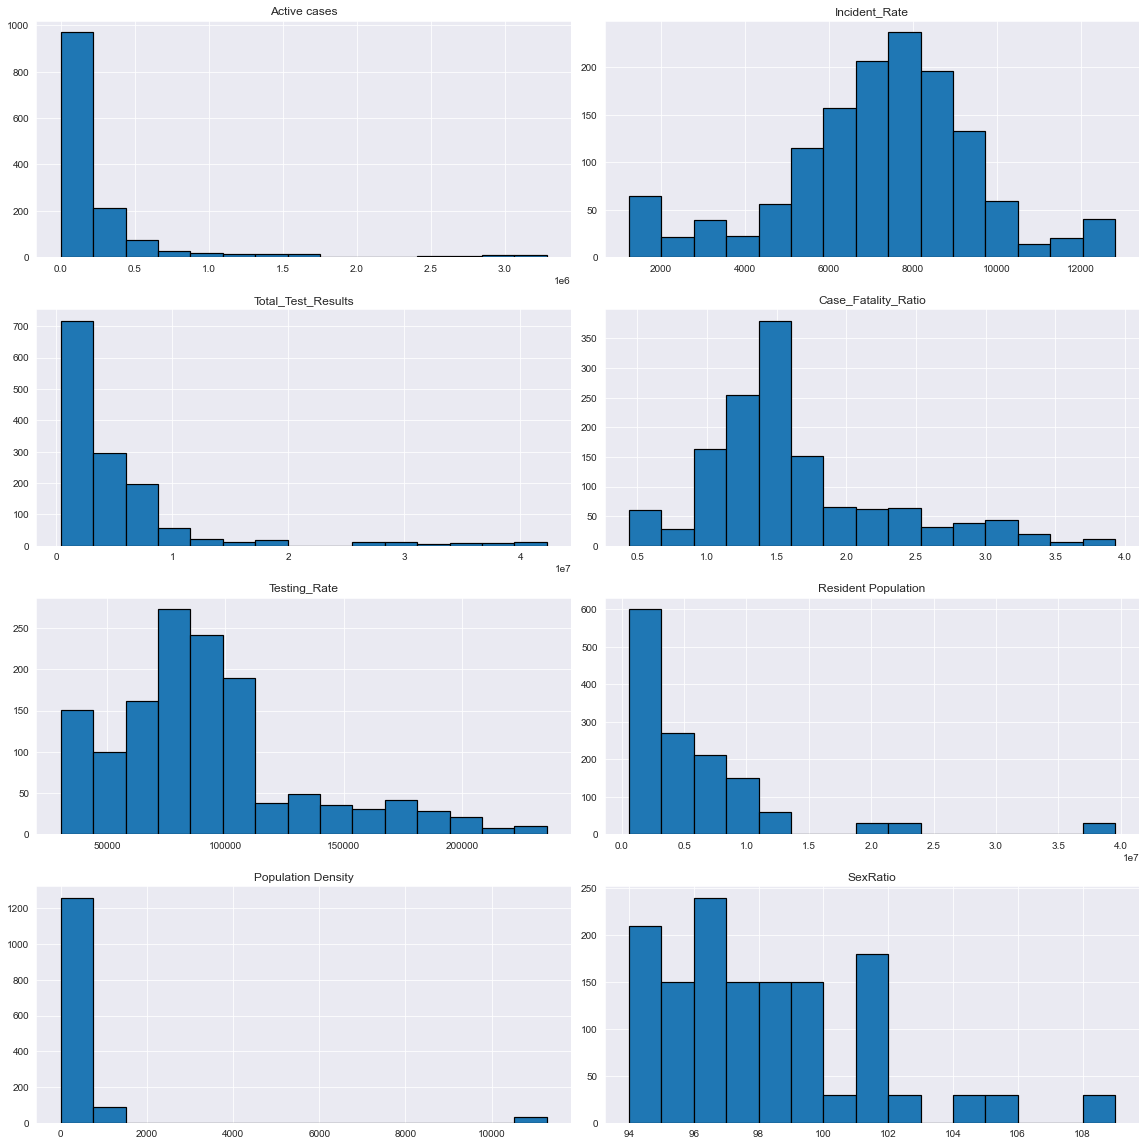

In [24]:
#histogram
n_bins = 15
fig, axes = plt.subplots(4, 2 , figsize=(16,16))
axes[0,0].hist(covid_features['Active'], bins = n_bins, edgecolor='black', linewidth=1.2)
axes[0,0].set_title('Active cases')
axes[0,1].hist(covid_features['Incident_Rate'], bins = n_bins, edgecolor='black', linewidth=1.2)
axes[0,1].set_title('Incident_Rate')
axes[1,0].hist(covid_features['Total_Test_Results'], bins = n_bins, edgecolor='black', linewidth=1.2)
axes[1,0].set_title('Total_Test_Results')
axes[1,1].hist(covid_features['Case_Fatality_Ratio'], bins = n_bins, edgecolor='black', linewidth=1.2)
axes[1,1].set_title('Case_Fatality_Ratio')
axes[2,0].hist(covid_features['Testing_Rate'], bins = n_bins, edgecolor='black', linewidth=1.2)
axes[2,0].set_title('Testing_Rate')
axes[2,1].hist(covid_features['Resident Population 2020 Census'], bins = n_bins, edgecolor='black', linewidth=1.2)
axes[2,1].set_title('Resident Population')
axes[3,0].hist(covid_features['Population Density 2020 Census'], bins = n_bins, edgecolor='black', linewidth=1.2)
axes[3,0].set_title('Population Density')
axes[3,1].hist(covid_features['SexRatio'], bins = n_bins, edgecolor='black', linewidth=1.2)
axes[3,1].set_title('SexRatio')
# adding some padding / spacing between subplots
fig.tight_layout(pad=1.0)

<h2 style="text-align:center; color:#FF8D33">Z-score Regularization of the dataset</h2>

In [25]:
scaler = preprocessing.StandardScaler()
scaled_covid = covid_features.copy()
scaled_covid = pd.DataFrame(scaler.fit_transform(scaled_covid), columns=scaled_covid.columns)
scaled_covid.head()

,Active,Case_Fatality_Ratio,Density Rank 2020 Census,Incident_Rate,Population Density 2020 Census,Resident Population 2020 Census,SexRatio,State ID_0,State ID_1,State ID_10,...,Day_20,Day_21,Day_22,Day_23,Day_24,Day_25,Day_26,Day_27,Day_28,Day_29
0,-0.200701,-0.476902,0.118788,0.144028,-0.217091,-0.128626,-1.168679,6.708204,-0.149071,-0.149071,...,-0.185695,-0.185695,-0.185695,-0.185695,-0.185695,-0.185695,-0.185695,-0.185695,-0.185695,-0.185695
1,-0.449116,-1.800519,1.614954,-0.290315,-0.276853,-0.754447,3.492526,-0.149071,6.708204,-0.149071,...,-0.185695,-0.185695,-0.185695,-0.185695,-0.185695,-0.185695,-0.185695,-0.185695,-0.185695,-0.185695
2,0.389194,0.074416,0.509092,0.088543,-0.239250,0.181627,0.385056,-0.149071,-0.149071,-0.149071,...,-0.185695,-0.185695,-0.185695,-0.185695,-0.185695,-0.185695,-0.185695,-0.185695,-0.185695,-0.185695
3,-0.482520,-0.031311,0.574143,0.202252,-0.242302,-0.422184,-0.547185,-0.149071,-0.149071,-0.149071,...,-0.185695,-0.185695,-0.185695,-0.185695,-0.185695,-0.185695,-0.185695,-0.185695,-0.185695,-0.185695
4,4.276989,-0.792949,-0.922023,-0.502599,-0.122779,4.905194,0.385056,-0.149071,-0.149071,-0.149071,...,-0.185695,-0.185695,-0.185695,-0.185695,-0.185695,-0.185695,-0.185695,-0.185695,-0.185695,-0.185695


In [26]:
scaled_covid.dtypes

Active                            float64
Case_Fatality_Ratio               float64
Density Rank 2020 Census          float64
Incident_Rate                     float64
Population Density 2020 Census    float64
                                   ...   
Day_25                            float64
Day_26                            float64
Day_27                            float64
Day_28                            float64
Day_29                            float64
Length: 85, dtype: object

<h2 style="text-align:center; color:#FF8D33">Dealing with Outliers</h2>

In [27]:
#Menghapus baris yang memiliki nilai insiden_rate lebih besar dari 2,5 nilai Z-Score atau kurang dari -2,5 nilai Z-Score

scaled_covid_clean = scaled_covid[scaled_covid['Incident_Rate'].between(-2.5, 2.5)]

In [28]:
# #Menghapus baris yang memiliki Case Fatality Ratio lebih besar dari 3 nilai Z-Score atau lebih kecil dari -3 nilai Z-Score
scaled_covid_clean = scaled_covid_clean[scaled_covid_clean['Case_Fatality_Ratio'].between (-3, 3)]

In [29]:
scaled_covid_clean

,Active,Case_Fatality_Ratio,Density Rank 2020 Census,Incident_Rate,Population Density 2020 Census,Resident Population 2020 Census,SexRatio,State ID_0,State ID_1,State ID_10,...,Day_20,Day_21,Day_22,Day_23,Day_24,Day_25,Day_26,Day_27,Day_28,Day_29
0,-0.200701,-0.476902,0.118788,0.144028,-0.217091,-0.128626,-1.168679,6.708204,-0.149071,-0.149071,...,-0.185695,-0.185695,-0.185695,-0.185695,-0.185695,-0.185695,-0.185695,-0.185695,-0.185695,-0.185695
1,-0.449116,-1.800519,1.614954,-0.290315,-0.276853,-0.754447,3.492526,-0.149071,6.708204,-0.149071,...,-0.185695,-0.185695,-0.185695,-0.185695,-0.185695,-0.185695,-0.185695,-0.185695,-0.185695,-0.185695
2,0.389194,0.074416,0.509092,0.088543,-0.239250,0.181627,0.385056,-0.149071,-0.149071,-0.149071,...,-0.185695,-0.185695,-0.185695,-0.185695,-0.185695,-0.185695,-0.185695,-0.185695,-0.185695,-0.185695
3,-0.482520,-0.031311,0.574143,0.202252,-0.242302,-0.422184,-0.547185,-0.149071,-0.149071,-0.149071,...,-0.185695,-0.185695,-0.185695,-0.185695,-0.185695,-0.185695,-0.185695,-0.185695,-0.185695,-0.185695
4,4.276989,-0.792949,-0.922023,-0.502599,-0.122779,4.905194,0.385056,-0.149071,-0.149071,-0.149071,...,-0.185695,-0.185695,-0.185695,-0.185695,-0.185695,-0.185695,-0.185695,-0.185695,-0.185695,-0.185695
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1375,-0.524201,-0.270412,0.378991,-2.293948,-0.235038,-0.767619,-0.236438,-0.149071,-0.149071,-0.149071,...,-0.185695,-0.185695,-0.185695,-0.185695,-0.185695,-0.185695,-0.185695,-0.185695,-0.185695,5.385165
1376,0.400942,-0.534982,-0.726871,-0.559558,-0.144206,0.397468,-0.236438,-0.149071,-0.149071,-0.149071,...,-0.185695,-0.185695,-0.185695,-0.185695,-0.185695,-0.185695,-0.185695,-0.185695,-0.185695,5.385165
1377,-0.488254,0.062389,0.248890,-0.195930,-0.232108,-0.599800,0.074309,-0.149071,-0.149071,-0.149071,...,-0.185695,-0.185695,-0.185695,-0.185695,-0.185695,-0.185695,-0.185695,-0.185695,-0.185695,5.385165
1378,-0.391879,-0.830494,-0.011313,1.287559,-0.211231,-0.001819,0.385056,-0.149071,-0.149071,-0.149071,...,-0.185695,-0.185695,-0.185695,-0.185695,-0.185695,-0.185695,-0.185695,-0.185695,-0.185695,5.385165


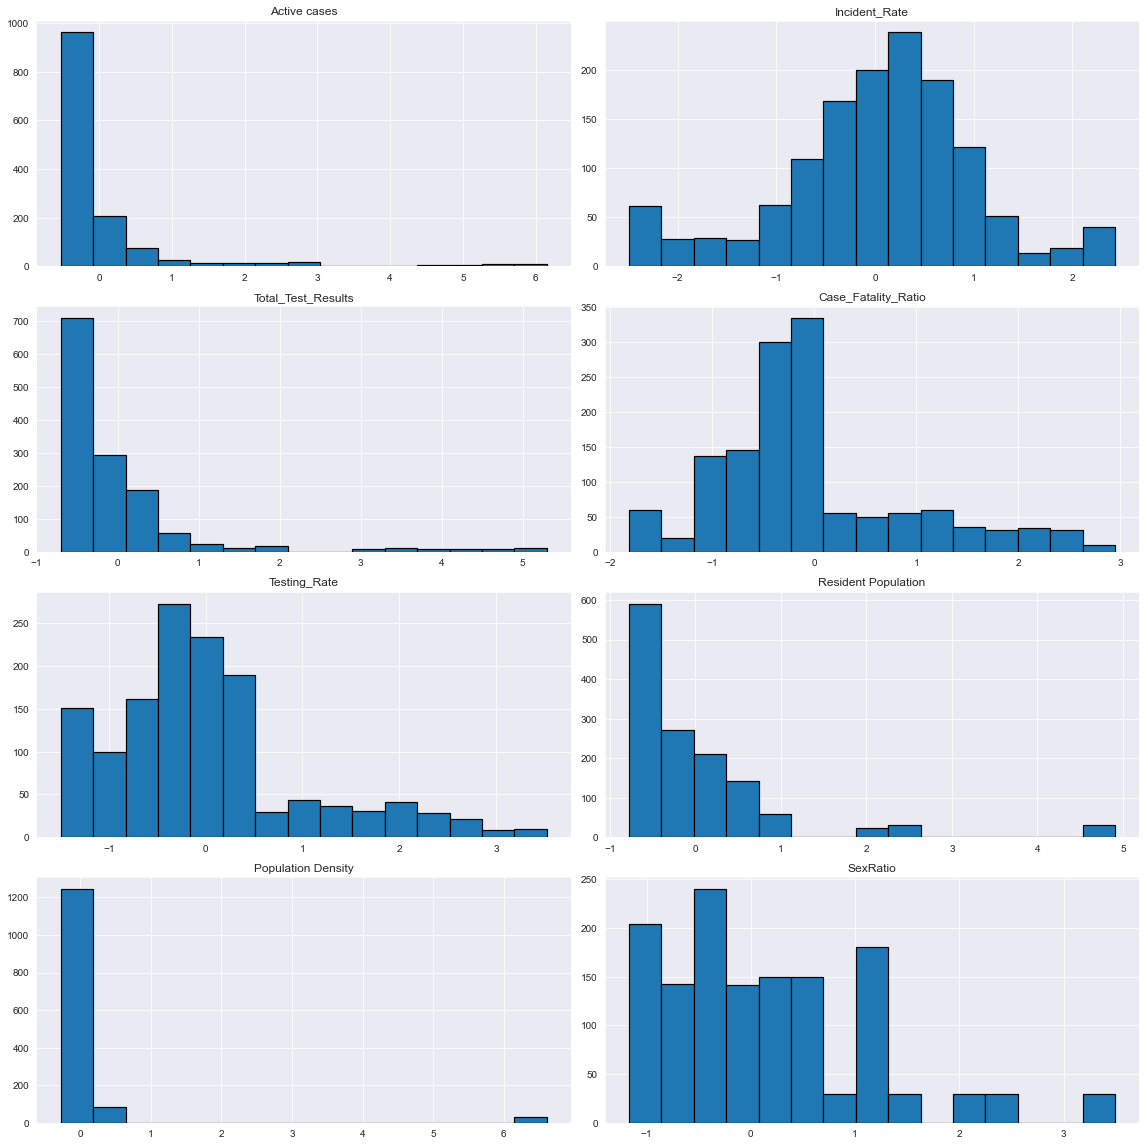

In [30]:
# histogram
n_bins = 15
fig, axes = plt.subplots(4, 2 , figsize=(16,16))
axes[0,0].hist(scaled_covid_clean['Active'], bins = n_bins, edgecolor='black', linewidth=1.2)
axes[0,0].set_title('Active cases')
axes[0,1].hist(scaled_covid_clean['Incident_Rate'], bins = n_bins, edgecolor='black', linewidth=1.2)
axes[0,1].set_title('Incident_Rate')
axes[1,0].hist(scaled_covid_clean['Total_Test_Results'], bins = n_bins, edgecolor='black', linewidth=1.2)
axes[1,0].set_title('Total_Test_Results')
axes[1,1].hist(scaled_covid_clean['Case_Fatality_Ratio'], bins = n_bins, edgecolor='black', linewidth=1.2)
axes[1,1].set_title('Case_Fatality_Ratio')
axes[2,0].hist(scaled_covid_clean['Testing_Rate'], bins = n_bins, edgecolor='black', linewidth=1.2)
axes[2,0].set_title('Testing_Rate')
axes[2,1].hist(scaled_covid_clean['Resident Population 2020 Census'], bins = n_bins, edgecolor='black', linewidth=1.2)
axes[2,1].set_title('Resident Population')
axes[3,0].hist(scaled_covid_clean['Population Density 2020 Census'], bins = n_bins, edgecolor='black', linewidth=1.2)
axes[3,0].set_title('Population Density')
axes[3,1].hist(scaled_covid_clean['SexRatio'], bins = n_bins, edgecolor='black', linewidth=1.2)
axes[3,1].set_title('SexRatio')

# adding some padding / spacing between subplots
fig.tight_layout(pad=1.0)

<h3 style="text-align:center; color:Orange">Plot pasangan semua atribut terhadap Label yang Dipulihkan</h3>

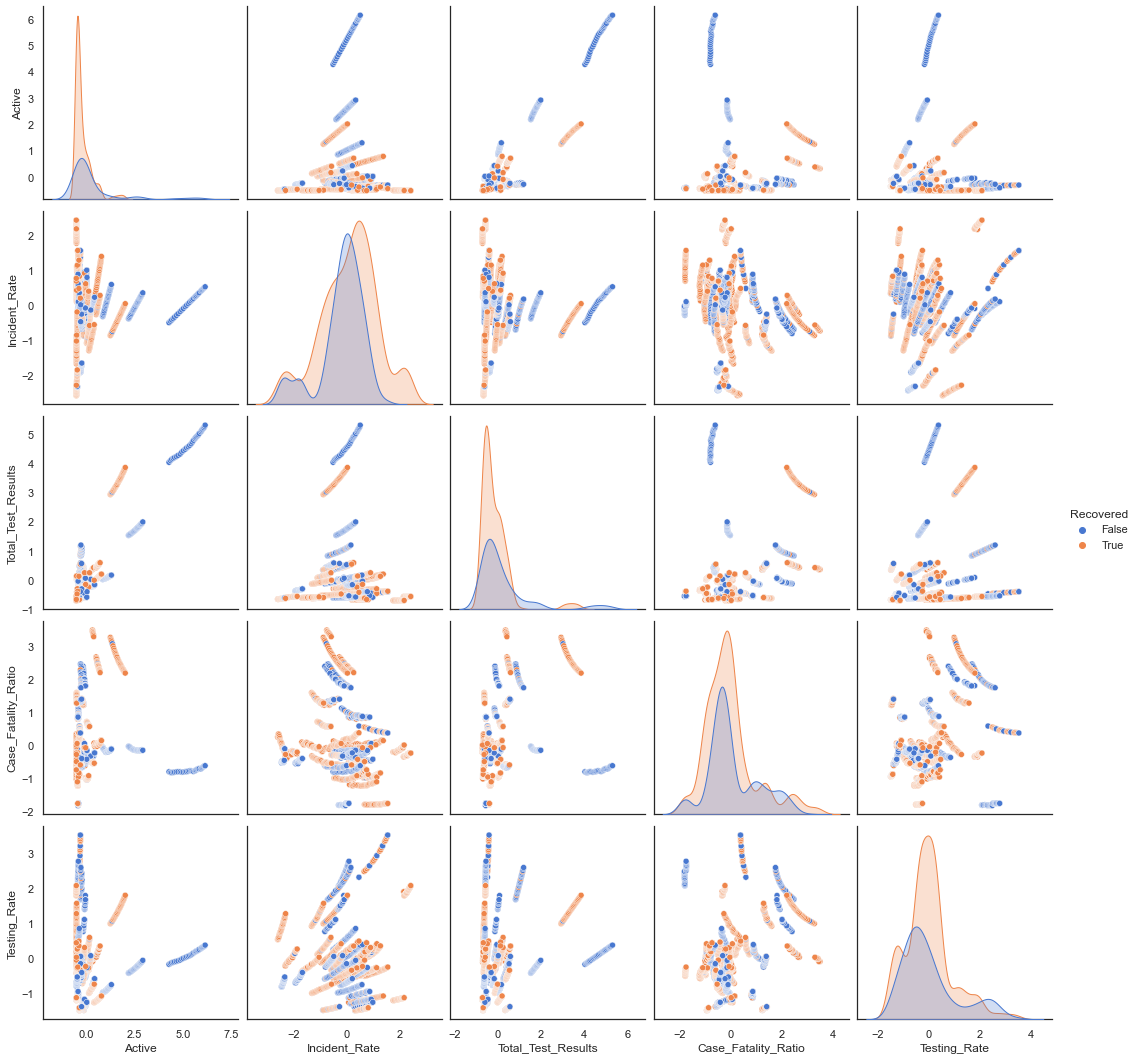

In [31]:
#Making scatter plots of selected paired features by using seaborn's pairplot function:
sns.set(style = 'white', palette="muted")
sns.pairplot(scaled_covid[['Active', 'Incident_Rate', 'Total_Test_Results', 'Case_Fatality_Ratio', 'Testing_Rate']].join(covid[['Recovered']]), hue= 'Recovered', height=3, aspect=1)

<h3 style="text-align:center; color:Orange">Plot pasangan semua atribut terhadap Label yang Dikonfirmasi</h3>

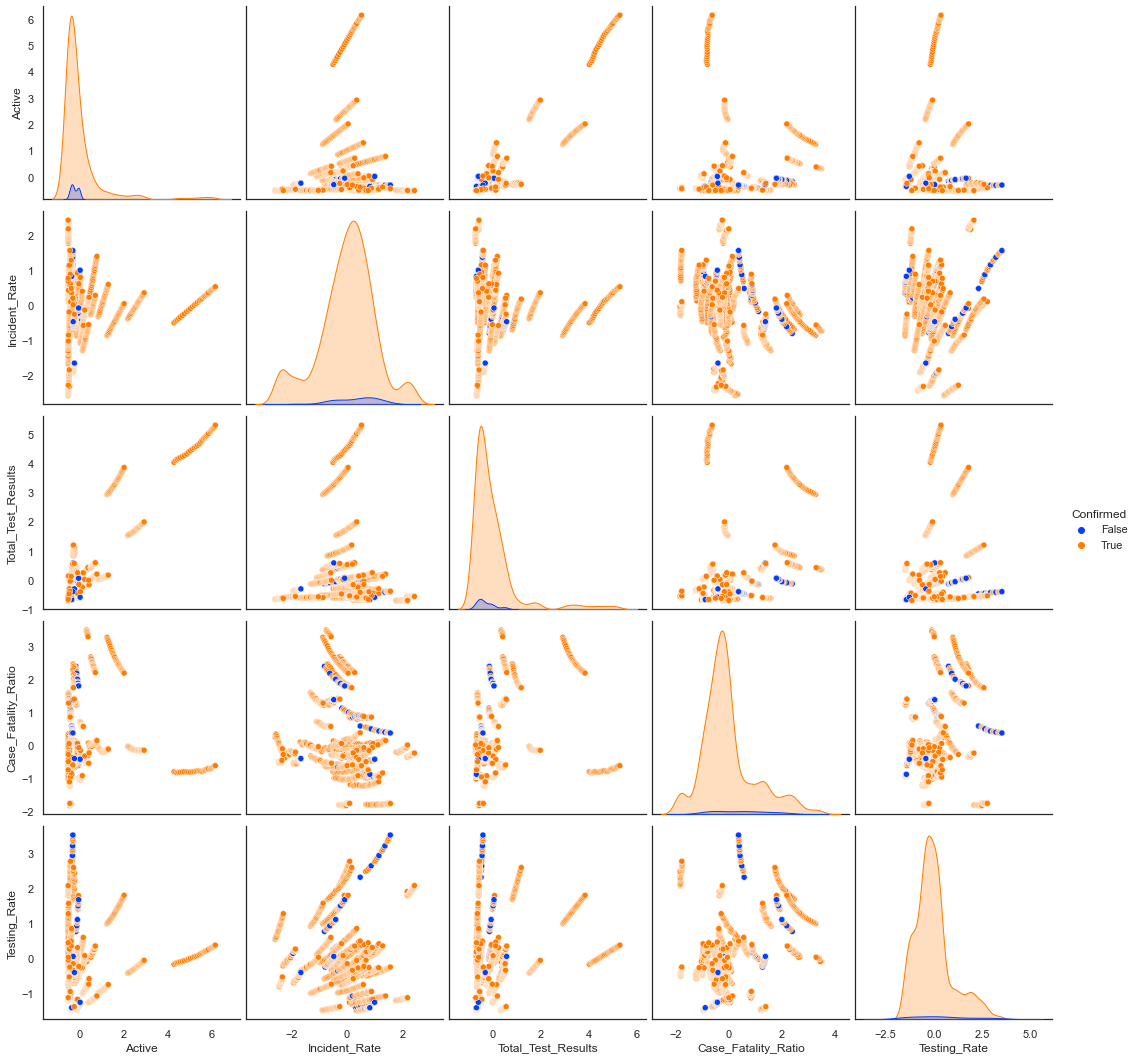

In [32]:
# Making scatter plots of selected paired features by using seaborn's pairplot function:
sns.set(style='white', palette="bright", color_codes=True)
sns.pairplot(scaled_covid[['Active', 'Incident_Rate', 'Total_Test_Results', 'Case_Fatality_Ratio', 'Testing_Rate']].join(covid[['Confirmed']]), hue='Confirmed', height=3, aspect=1)

<h3 style="text-align:center; color:Orange">Plot pasangan semua atribut terhadap Label yang Mati</h3>

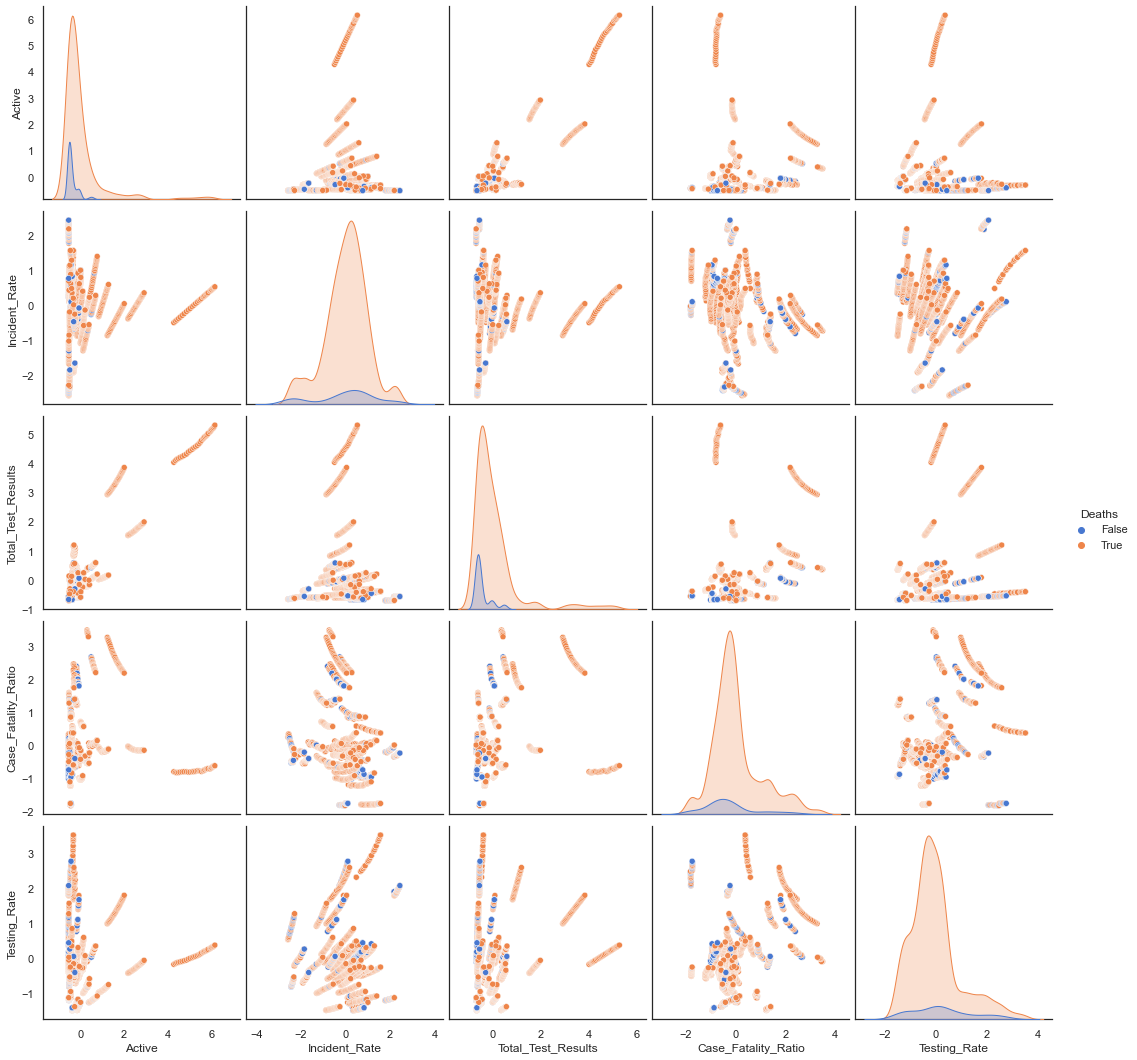

In [33]:
#Making scatter plots of selected paired features by using seaborn's pairplot function:
sns.set(style = 'white', palette="muted")
sns.pairplot(scaled_covid[['Active', 'Incident_Rate', 'Total_Test_Results',
                   'Case_Fatality_Ratio', 'Testing_Rate']].join(covid[['Deaths']]),
            hue = 'Deaths', height=3, aspect=1)
plt.show()

<h2 style="text-align:center; color:#FF5733"> [CM2] PCA and LDA Implementation</h2><br> <br>
<h3 style="text-align:center"> PCA Implementation </h3><br>
<h5>Principal Component Analysis (PCA) adalah teknik transformasi linier tanpa pengawasan yang banyak digunakan di berbagai bidang, paling menonjol untuk ekstraksi fitur dan pengurangan dimensi. Ini membantu kami mengidentifikasi pola dalam data berdasarkan korelasi antar fitur. Sebagai hasil dari transformasi data d-dimensi asli ke sub-ruang k-dimensi baru ini (biasanya k d), komponen utama pertama akan memiliki varians terbesar yang mungkin.</h5>

In [37]:
from sklearn.decomposition import PCA
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)

def implement_PCA(components, data, svd_solver='auto'):
    pca = PCA(n_components = components, svd_solver=svd_solver)
    Principal_Components = pca.fit_transform(data)
    df_pca = pd.DataFrame(data = Principal_Components)
    return(df_pca, pca)

def PCA_ScreePlot(pca):
    pc_value = np.arange(pca.n_components_) + 1
    plt.figure(figsize=(15,8))
    plt.plot(pc_value, pca.explained_variance_ratio_, 'ro-', linewidth=2)
    plt.grid()
    plt.title('Scree Plot')
    plt.xlabel('Principal Component')
    plt.ylabel('Proportion of variance explained')
    plt.locator_params(axis="y", nbins=25)
    plt.show()

<h3 style="text-align:center"> Applying PCA with n_components = 10 </h3>

In [38]:
pca_implement = implement_PCA(components=10, data=scaled_covid)
pca_features_covid = pca_implement[0]
pca_covid_data = pca_implement[1]

<h3 style="text-align:center"> Scree Plot depicting the cumulative variance represented by the eigen vectors </h3><br>
<h5>Using Scree Plot which depicts the cumulative variance represented by the eigen vectors. (Plotting n_components vs Variance). The best values of n_components is when slope starts leveling off.</h5>

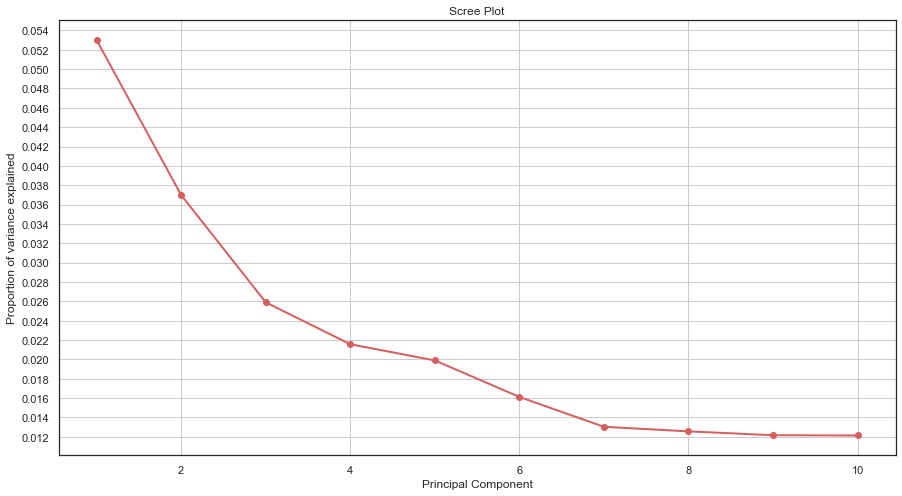

In [39]:
PCA_ScreePlot(pca_covid_data)

<h4>Dari grafik di atas, kita dapat mencatat bahwa pada komponen utama ke-4, varians kumulatif kurang dari 0,022, sehingga bahkan pada komponen ke-4 kita tidak kehilangan banyak informasi dan kita telah mempertahankan lebih dari 99,97% karakteristik. Jadi, kita bisa memilih 4 komponen PCA pertama. Jika kita perlu menyimpan lebih banyak informasi, kita dapat mempertimbangkan lebih banyak komponen.</h4>

<h2 style="text-align:center; color:#FF5733">Plotting the first 2 PCA components on Day 3 data for all the states </h2>

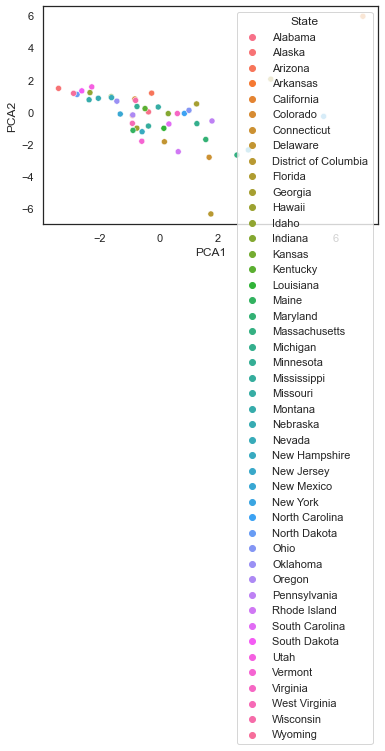

In [40]:
day_3_covid_data_indices = df.index[df['Day']==3]
day_3_covid_data = pca_features_covid.iloc[day_3_covid_data_indices, 0:2]
state_names = df.iloc[day_3_covid_data_indices, 2]
day_3_covid_data = day_3_covid_data.join(state_names)
day_3_covid_data.columns = ['PCA1', 'PCA2', 'State']
p = sns.scatterplot(x = 'PCA1', y="PCA2", hue='State', data = day_3_covid_data)